In [1]:
from tamkin import *
from molmod import *

import matplotlib.pyplot as plt
import numpy
numpy.testing.Tester = False
import re

import sys
#sys.path.insert(0, '../code/')
from tamkintools_multi_fidelity_bayesian.tamkin_multi_fidelity import *

sys.path.insert(-1, '/home/derwer/Desktop/PHD/QM_ThermoKolloq22_multifidelity/')
from tamkintools import *

import os 
from datetime import date
np.bool = bool

# Impact of High Energy Points

in this notebook a high energy data point is removed to show the importance of knowing the energy ranges of high fidelity scans

In [2]:
#############
# Constants #
#############
R = 8.3144598
R_a = 8.3144598
kcal = 4.1868 # kJ

level_prec = 200
T_plot     = 1
ExtRotSym  = 1

PIa            = load_molecule_g03fchk("scan_data/PI/PIafreq.fchk")
PIb            = load_molecule_g03fchk("scan_data/PI/PIbfreq.fchk")

scanPI         = load_rotscan_g03log("scan_data/PI/scan_PIa_p_repl.log")
angles, energies = scanPI.potential 
scanPI_corrected = erase_point_scan(scanPI,12)
corrected_angles, corrected_energies = scanPI_corrected.potential
print('angles in the orig_scan is: ' + str(angles))
ref_energy = min(energies)
print('ref energy in script is : ' +str(ref_energy))
#erased_angle = angles[12]
#erased_energies = energies[12]
#erase_potential = [erased_angles, erased_energies] 
angles, energies = scanPI_corrected.potential
print('the angles in corrected scan is: ' + str(corrected_angles))
erased_point = erase_point(scanPI, 12)
print('erased_points are in the script: ' +str(erased_point))
nma_PIa        = NMA(PIa, ConstrainExt())
nma_PIb        = NMA(PIb, ConstrainExt())

nma_angle = dihed_angle(nma_PIa.coordinates[scanPI_corrected.dihedral])[0]
ref_energy = potential_reference(scanPI, nma_angle)
print('ref energy is: ' +str(ref_energy)) 
scan_PIhigh = add_point(scanPI_corrected, -150.69257/180.0*numpy.pi, 3.08/2625.4995+ref_energy) #TShigh
scan_PIlow  = add_point(scan_PIhigh,         1.20334/180.0*numpy.pi, 1.04/2625.4995+ref_energy) #TSlow
scan_PI2    = add_point(scan_PIlow,        -33.81733/180.0*numpy.pi, 0.37/2625.4995+ref_energy) #TSlow
scan_PI3    = add_point(scan_PI2,           65.75423/180.0*numpy.pi, 0.00/2625.4995+ref_energy) #TSlow


myadded_points = [[-150.69257/180.0*numpy.pi,
		      1.20334/180.0*numpy.pi,
		    -33.81733/180.0*numpy.pi,
		     65.75423/180.0*numpy.pi],
                  [3.08/2625.4995+ref_energy,
		   1.04/2625.4995+ref_energy,
		   0.37/2625.4995+ref_energy,
		   0.00/2625.4995+ref_energy]]


myweights = [0.02 for i in range(24)]
myweights[12] = 0.0
myweights.append(100)
myweights.append(100)
myweights.append(100)
myweights.append(100)


myderivativevalues  = [0.0 for i in range(4)]
#myderivatepostition = [numpy.pi/180*180,numpy.pi/180*59.25,numpy.pi/180*37.69,37.69/180*95.11]
myderivatepostition = [-150.69257/180.0*numpy.pi,
		          1.20334/180.0*numpy.pi,
		        -33.81733/180.0*numpy.pi,
		         65.75423/180.0*numpy.pi]
myderivateweights = [0.1 for i in range(len(myderivatepostition))]
myderivative = [myderivativevalues,myderivatepostition,myderivateweights]

angles in the orig_scan is: [ 1.1476278   1.40942797  1.67122639  1.93302725  2.19482396  2.45662461
  2.7184251   2.98022019 -3.04115906 -2.77936506 -2.51756264 -2.25576694
 -1.99396468 -1.73216472 -1.47036585 -1.20856436 -0.94676699 -0.68496738
 -0.42317072 -0.16136472  0.10042949  0.36223282  0.62402719  0.88582707
  1.14762869]
ref energy in script is : -384.815763515
the angles in corrected scan is: [ 1.1476278   1.40942797  1.67122639  1.93302725  2.19482396  2.45662461
  2.7184251   2.98022019 -3.04115906 -2.77936506 -2.51756264 -2.25576694
 -1.73216472 -1.47036585 -1.20856436 -0.94676699 -0.68496738 -0.42317072
 -0.16136472  0.10042949  0.36223282  0.62402719  0.88582707  1.14762869]
erased_potential in combine_scans are: [[-1.9939646802173705], [-384.391592515]]
erased_points are in the script: [[-1.9939646802173705], [-384.391592515]]
ref energy is: -384.815763515


28

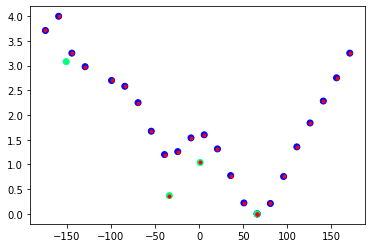

In [3]:
# plot scan data with weights
a, b = scan_PI3.potential
b = b*2625.5
b = b - np.min(b)
e_max = np.max(b)
a = a/np.pi*180

xxx = -4
p = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24,25,  26, 27])
p = np.delete(p,xxx)

aa = a[p] 
bb = b[p]
weiwei = np.array(myweights)[p]

plt.plot(aa,bb,"r.")
plt.scatter(a,b, c=myweights, cmap="winter")
len(a)

zero weights excluded
number of fidelities: 2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1.]
angle range: 344.9996181762406
set angle range 360


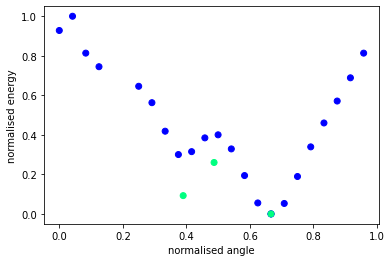

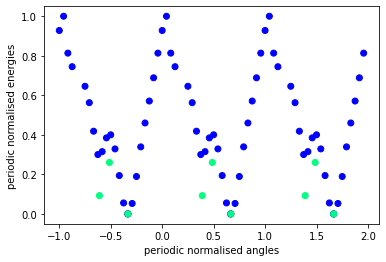

(78, 2)
(78, 1)
Optimization restart 1/5, f = -107.58075610913225
Optimization restart 2/5, f = -107.58075667449734
Optimization restart 3/5, f = -107.58075621570602
Optimization restart 4/5, f = -107.58074321424357
Optimization restart 5/5, f = -107.58075648081135


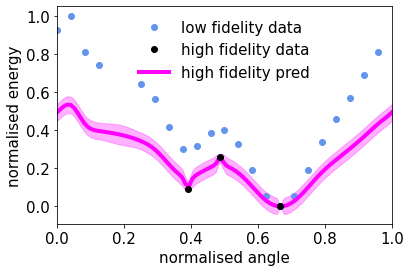

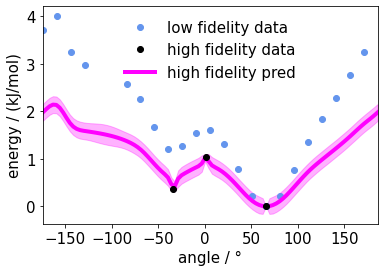

gp.,value,constraints,priors
multifidelity.Mat32.variance,0.32720701658104234,+ve,
multifidelity.Mat32.lengthscale,0.33389357442957623,+ve,
multifidelity.Mat32_1.variance,0.0019357794974399554,+ve,
multifidelity.Mat32_1.lengthscale,0.008207111613844765,+ve,
multifidelity.scale,0.5325828031188137,,
mixed_noise.Gaussian_noise.variance,1e-07,+ve fixed,
mixed_noise.Gaussian_noise_1.variance,1e-07,+ve fixed,


In [4]:

# initialize tamkin multi fidelity
tmf = tamkin_multi_fidelity( aa, bb, weiwei, angle_range=2*180)
# initialize multi fidelity model
# the default kernel is the RBF Kernel.
# https://gpy.readthedocs.io/en/deploy/GPy.kern.html
#tmf.multi_fidelity()
tmf.multi_fidelity(kernel=GPy.kern.Matern32)

# adjust hyperparameters and so on before model is trained
tmf.lin_mf_model.gpy_model.mixed_noise.Gaussian_noise.fix(0.0000001)
tmf.lin_mf_model.gpy_model.mixed_noise.Gaussian_noise_1.fix(0.0000001)

# train multi fidelity model
tmf.train()
#plot results
tmf.plot_normed_results("normalised_multi_fidelity")
tmf.plot_results("multi_fidelity")

tmf.lin_mf_model.gpy_model



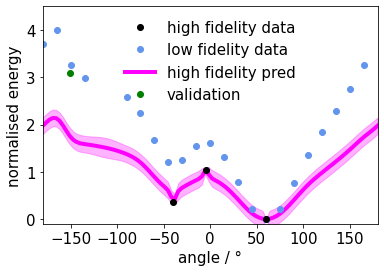

In [5]:
save = "multi_fidelity_red_add_"+str(abs(xxx))

dummy = np.linspace(0,1,100)
hf_mean, hf_std = tmf.predict_hf_normed(dummy)

ndummy = dummy*360-180
hf_mean = np.squeeze(hf_mean)*e_max
hf_std = np.squeeze(hf_std)*e_max

plt.plot(a[xxx],( b[xxx]-tmf.energy_min)/tmf.energy_range*e_max,"g.",markersize=tmf.msize, label="validation" )    

plt.plot(ndummy, hf_mean,color=tmf.colors[-1], label="high fidelity pred",linewidth=tmf.lsize)
plt.fill_between(ndummy, hf_mean-hf_std, hf_mean+hf_std,alpha=tmf.alpha,color=tmf.colors[-1])

#plt.scatter(self.angles, self.energies,c=self.fidelities, cmap=self.cmap)
for i,w in enumerate( tmf.unique_weights ):
    #print(i,w)
    p = np.squeeze( np.where( tmf.fidelities==i ) )
    plt.plot( tmf.normed_angles[p]*360-180, tmf.normed_energies[p]*e_max,".", 
             color=tmf.colors[i], label=tmf.fidelity_labels[i],
            markersize=tmf.msize)
  
plt.xlabel("angle / °",fontsize=tmf.fsize)
plt.ylabel("normalised energy",fontsize=tmf.fsize)
plt.xticks(fontsize=tmf.fsize)     
plt.yticks(fontsize=tmf.fsize)     
plt.xlim([-180,180])
plt.ylim([-0.1,4.5])

#plt.xticks( np.linspace( -1,1,5 )  ,np.linspace( -180, 180, 5) ,fontsize=tmf.fsize)  
plt.xlabel("angle / °",fontsize=tmf.fsize)

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
    fontsize=tmf.fsize,frameon=False ) #,loc='center left', bbox_to_anchor=(1.01, 0.5))
if save:
    plt.savefig(save+".png", bbox_inches='tight')
    plt.savefig(save+".pdf", bbox_inches='tight')
plt.show()
plt.close()        


In [6]:
save

'multi_fidelity_red_add_4'

In [7]:
tmf.energy_range

3.9969036700204015

In [8]:
a[xxx]*180/np.pi

-8634.048264979723